#Convolutional Neural Networks

##Convolution in n-dimensions

###1-dimension

In [ ]:
import numpy as np
h = np.convolve([2, 3, 2], [-1, 2, -1])
print(h)

[-2  1  2  1 -2]


In [ ]:
import numpy as np
h = np.convolve([2, 3, 2], [-1, 2, -1], 'valid')
print(h)

[2]


In [ ]:
import numpy as np
h = np.convolve([2, 3, 2], [-1, 2, -1], 'same')
print(h)

[1 2 1]


###2-dimensions

In [ ]:
import numpy as np
from scipy.signal import convolve2d
x = np.array([[2,2,2],[2,3,2],[2,2,2]])
w = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
h = convolve2d(x,w)
print(h)

[[-2 -4 -6 -4 -2]
 [-4  9  5  9 -4]
 [-6  5  8  5 -6]
 [-4  9  5  9 -4]
 [-2 -4 -6 -4 -2]]


In [ ]:
import numpy as np
from scipy.signal import convolve2d
x = np.array([[2,2,2],[2,3,2],[2,2,2]])
w = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
h = convolve2d(x,w,mode='valid')
print(h)
h = convolve2d(x,w,mode='same')
print(h)

[[8]]
[[9 5 9]
 [5 8 5]
 [9 5 9]]


###n-dimensions

In [ ]:
import numpy as np
from scipy.signal import convolve
x = np.array([[[1,1],[1,1]],[[2,2],[2,2]]])
w = np.array([[[1,-1],[1,-1]],[[1,-1],[1,-1]]])
h = convolve(x,w)
print(h)


[[[ 1  0 -1]
  [ 2  0 -2]
  [ 1  0 -1]]

 [[ 3  0 -3]
  [ 6  0 -6]
  [ 3  0 -3]]

 [[ 2  0 -2]
  [ 4  0 -4]
  [ 2  0 -2]]]


##Convolutional layers

###Conv2D

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
input_shape = (1, 32, 32, 3)
x = tf.random.normal(input_shape)
y = Conv2D(64, (9,9), strides=(2,2), activation='relu', 
           input_shape=input_shape)(x)
print(y.shape)

(1, 12, 12, 64)


##Pooling strategies

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
x = tf.constant([[-2,  -4,  -6,  -4],
                 [-4,   9,   5,   9],
                 [-6,   5,   8,   5],
                 [-4,   9,   5,   9]])
x = tf.reshape(x, [1, 4, 4, 1])
y = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
print(tf.reshape(y(x), [2, 2]))

tf.Tensor(
[[9 9]
 [9 9]], shape=(2, 2), dtype=int32)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D
x = tf.constant([[-2.,  -4.,  -6.,  -4],
                 [-4.,   9.,   5.,   9.],
                 [-6.,   5.,   8.,   5.],
                 [-4.,   9.,   5.,   9.]])
x = tf.reshape(x, [1, 4, 4, 1])
y = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
print(tf.reshape(y(x), [2, 2]))

tf.Tensor(
[[-0.25  1.  ]
 [ 1.    6.75]], shape=(2, 2), dtype=float32)


## Convolutional neural network for CIFAR-10

###Implementation

####Loading data

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


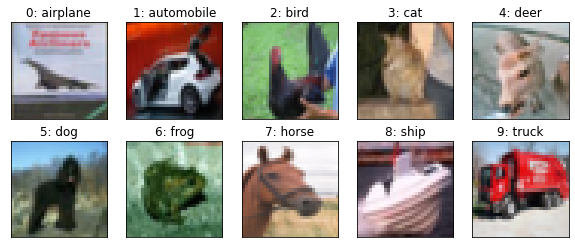

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(_, _), (_, labels) = cifar10.load_data()
idx = []
k = 0
i = 0
while i < 10:
  if labels[k] == i:
    idx.append(k)
    i += 1
  k += 1

clsmap = {0: 'airplane',
          1: 'automobile', 
          2: 'bird', 
          3: 'cat', 
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'}

plt.figure(figsize=(10,4))
for i, (img, y) in enumerate(zip(x_test[idx[0:10]].reshape(10, 32, 32, 3), labels[idx[0:10]])):
  plt.subplot(2, 5, i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y[0]) + ": " + clsmap[y[0]])
plt.savefig('ch.12.cifar10.samples.png', bbox_inches='tight', dpi=350)
plt.show()


####Compiling the model

In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# dimensionality of input and latent encoded representations
inpt_dim = (32, 32, 3)

inpt_img = Input(shape=inpt_dim)

# Step 1 - Convolution
cl1 = Conv2D(64, (9, 9), strides=(2, 2), input_shape = inpt_dim, 
             activation = 'relu')(inpt_img)

# Step 2 - Pooling and BN
pl2 = MaxPooling2D(pool_size = (2, 2))(cl1)
bnl3 = BatchNormalization()(pl2)

# Adding a second convolutional layer
cl4 = Conv2D(128, (3, 3), strides=(1, 1), activation = 'relu')(bnl3)
pl5 = MaxPooling2D(pool_size = (2, 2))(cl4)
bnl6 = BatchNormalization()(pl5)

# Step 3 - Flattening
fl7 = Flatten()(bnl6)

# Step 4 - Full connection
dol8 = Dropout(0.5)(fl7)
dl9 = Dense(units = 256, activation = 'relu')(dol8)
dol10 = Dropout(0.2)(dl9)
dl11 = Dense(units = 64, activation = 'relu')(dol10)
dol12 = Dropout(0.1)(dl11)
output = Dense(units = 10, activation = 'sigmoid')(dol12)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        15616     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 128)        

####Training the CNN

In [ ]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 2s 5ms/step - loss: 0.2789 - accuracy: 0.3536 - val_loss: 0.2649 - val_accuracy: 0.3631
Epoch 2/1000
500/500 [==============================] - 2s 4ms/step - loss: 0.2290 - accuracy: 0.4744 - val_loss: 0.2380 - val_accuracy: 0.4374
Epoch 3/1000
500/500 [==============================] - 2s 4ms/step - loss: 0.2101 - accuracy: 0.5280 - val_loss: 0.2044 - val_accuracy: 0.5448
Epoch 4/1000
500/500 [==============================] - 2s 4ms/step - loss: 0.1982 - accuracy: 0.5589 - val_loss: 0.2090 - val_accuracy: 0.5321
Epoch 5/1000
500/500 [==============================] - 2s 4ms/step - loss: 0.1895 - accuracy: 0.5853 - val_loss: 0.2102 - val_accuracy: 0.5282
Epoch 6/1000
500/500 [==============================] - 2s 4ms/step - loss: 0.1811 - accuracy: 0.6040 - val_loss: 0.1818 - val_accuracy: 0.6038
Epoch 7/1000
500/500 [==============================] - 2s 4ms/step - loss: 0.1758 - accuracy: 0.6182 - val_loss: 0.1992 - val_accuracy:

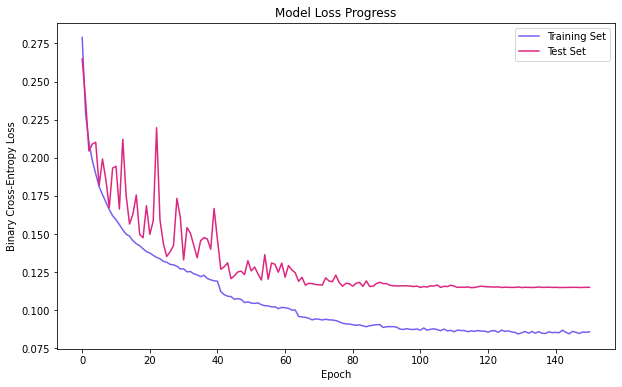

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.12.cnn.cifar10.loss.png', dpi=350, bbox_inches='tight')
plt.show()


###Results

(10000, 10)
(10000,)
[ 4.0430916e-04  1.3163970e-04  9.3675386e-03 -9.3769372e-02
  5.5256765e-03  7.8474246e-02  2.8924153e-03  9.5576193e-04
  9.0277253e-04  5.6120061e-05]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.86      0.86      0.86      1000
           2       0.71      0.66      0.69      1000
           3       0.57      0.64      0.60      1000
           4       0.75      0.72      0.74      1000
           5       0.71      0.65      0.68      1000
           6       0.84      0.83      0.83      1000
           7       0.80      0.80      0.80      1000
           8       0.86      0.86      0.86      1000
           9       0.83      0.84      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

[[806  22  32  15  14   3  10  13  56  29]
 [ 18 860   4  12   3  

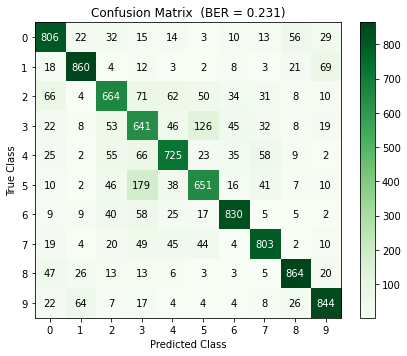

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np

(_, _), (_, labels) = cifar10.load_data()

y_ = labels
y_hat = classifier.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)

print(y_hat.shape)
print(y_pred.shape)

print(y_hat[0] - y_test[0])
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(cm)
ber = 1- balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1))
print('BER', ber)

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
       yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       title='Confusion Matrix  (BER = {0:0.3f})'.format(ber),
       ylabel='True Class',
       xlabel='Predicted Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
np.set_printoptions(precision=2)
plt.axis('tight')
plt.savefig('ch.12.cnn.cifar10.cm.png', dpi=350, bbox_inches='tight')
plt.show()


###Visualization of filters

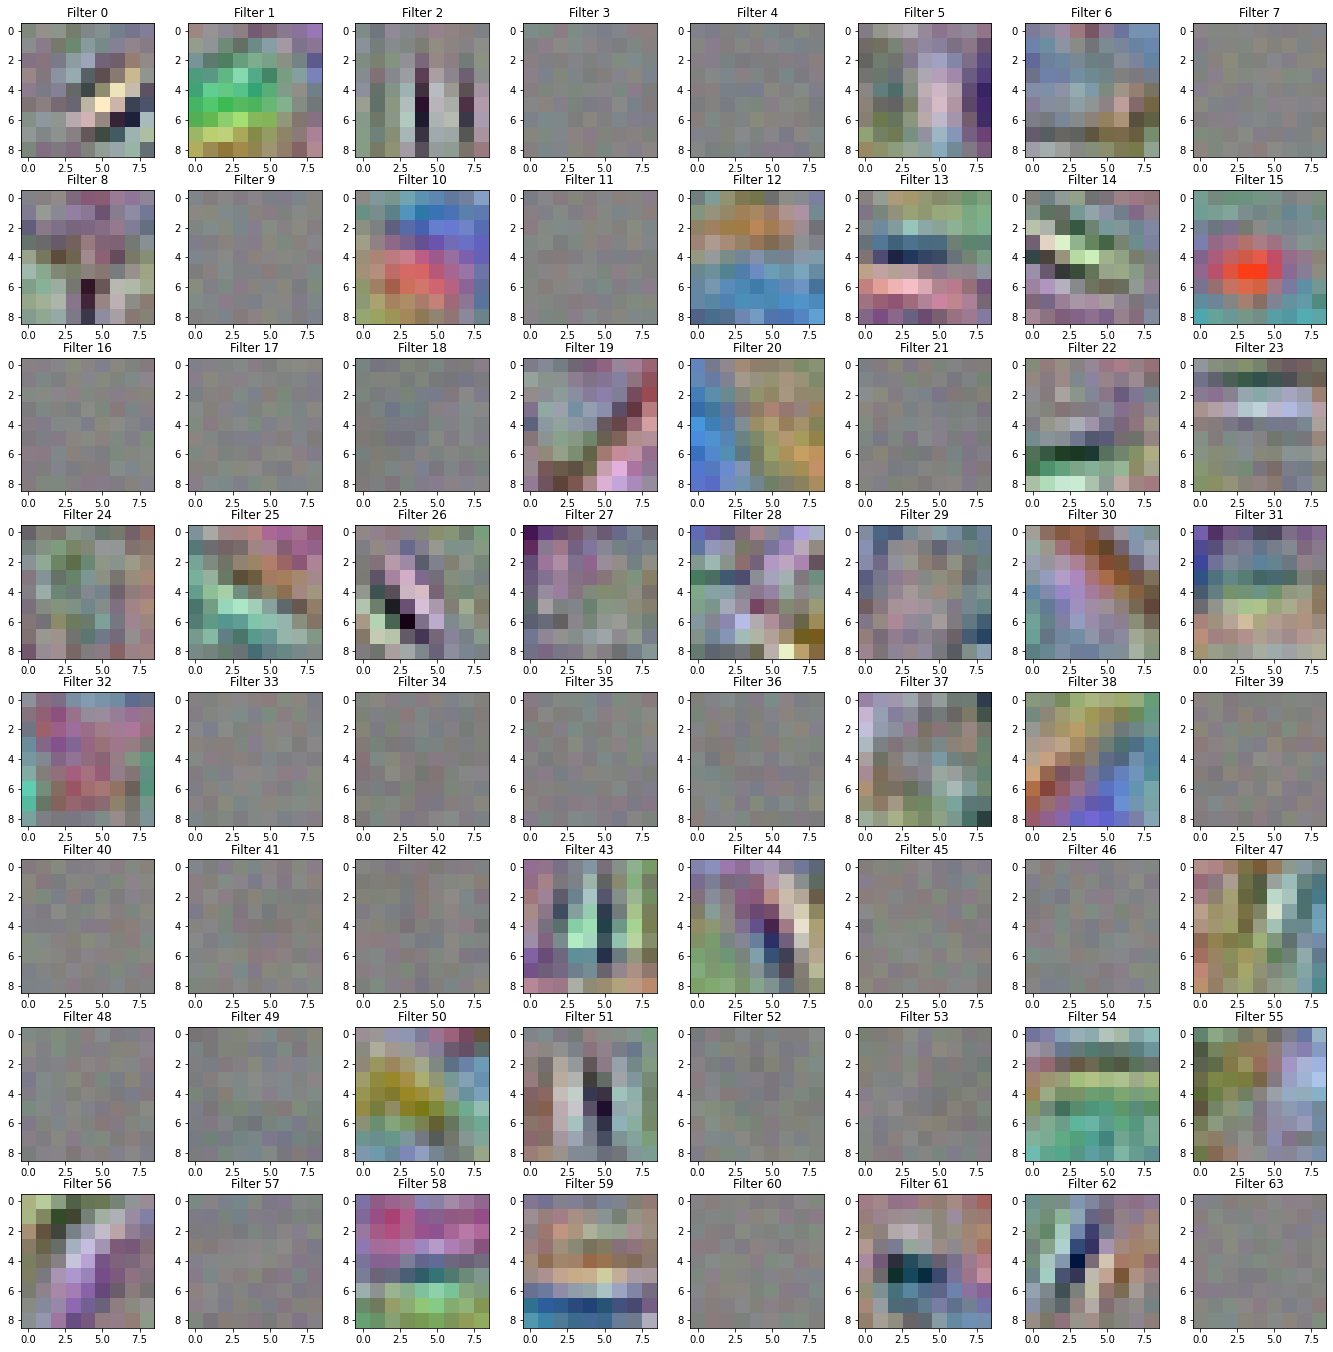

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("ch.12.cnn.full.filters.png", bbox_inches='tight', dpi=350)
